Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the path if necessary)
dataset = 'airline_passenger_satisfaction.csv'
df = pd.read_csv(dataset)

Removing the 393 empty rows from Arrival Delay (due to their small proportion of only 0.03% of the data), new dataframe (df_cleaned),  original dataframe (df) will remain unchanged

In [ ]:
# Remove rows with missing 'Arrival Delay' without modifying the original DataFrame in place
df_cleaned = df.dropna(subset=['Arrival Delay'])
#df_cleaned.to_csv('data_cleaned.csv', index=False)
df_cleaned


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


Encode categorical values into binary

In [ ]:
#Create a copy of the cleaned dataset
df_convert = df_cleaned.copy()

# Encode categorical variables
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

df_convert = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Convert Satisfaction to binary (Satisfied = 1, Neutral/Dissatisfied = 0)
df_convert['Satisfaction'] = df_cleaned['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})


df_convert.columns


Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Gender_Male', 'Customer Type_Returning', 'Type of Travel_Personal',
       'Class_Economy', 'Class_Economy Plus'],
      dtype='object')

Scale the numerical values to be inbetween 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_convert)
df_scaled = pd.DataFrame(scaled_data, columns=df_convert.columns)
df_scaled



,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,0.000000,0.525641,0.159532,0.001256,0.003157,0.6,0.6,0.8,0.6,0.6,...,1.0,0.6,1.0,1.00,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000008,0.358974,0.159532,0.016332,0.024621,0.4,0.4,0.6,1.0,0.4,...,1.0,0.4,1.0,1.00,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000015,0.435897,0.165994,0.000000,0.000000,0.8,0.8,0.8,1.0,0.8,...,0.6,0.8,0.6,0.50,1.0,1.0,1.0,0.0,0.0,0.0
3,0.000023,0.551282,0.378433,0.000000,0.000000,0.4,0.4,0.6,0.8,0.4,...,1.0,0.4,1.0,1.00,1.0,1.0,1.0,0.0,0.0,0.0
4,0.000031,0.538462,0.694467,0.000000,0.000631,0.6,0.6,0.6,1.0,0.6,...,0.6,0.6,0.6,0.50,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0.999969,0.269231,0.084006,0.001256,0.001894,0.8,0.8,0.8,0.8,0.4,...,1.0,0.8,0.8,0.75,0.0,1.0,1.0,1.0,0.0,1.0
129483,0.999977,0.435897,0.055937,0.000000,0.000000,1.0,0.6,1.0,0.6,0.8,...,0.8,0.6,0.4,1.00,0.0,1.0,1.0,1.0,0.0,1.0
129484,0.999985,0.448718,0.061793,0.003769,0.008838,1.0,0.4,0.8,0.4,0.2,...,0.8,0.4,0.6,1.00,0.0,1.0,1.0,1.0,0.0,1.0
129485,0.999992,0.551282,0.061793,0.019472,0.013889,0.8,0.8,0.6,0.8,0.2,...,0.8,1.0,0.6,1.00,1.0,1.0,1.0,1.0,0.0,1.0


All code below is taken from https://machinelearningmastery.com/calculate-feature-importance-with-python/ and modified to fit our data with the help of ChatGPT.


Check the feature importance with Decision Tree and plot the graph. Some column names got changed during the process of encoding values to binary.

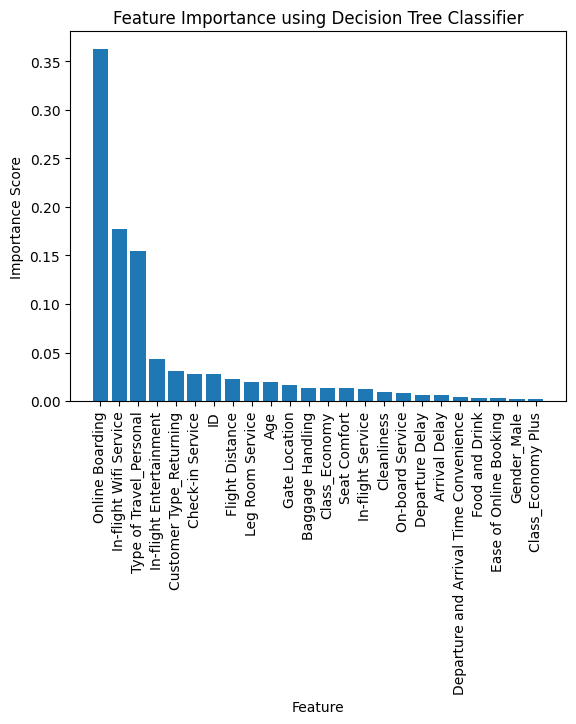

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting data
X = df_scaled.drop('Satisfaction', axis=1)
y = df_scaled['Satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Extract feature importances
importance = model.feature_importances_

# Map importance values to feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance for easier visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance using Decision Tree Classifier')
plt.show()


Logistic regression.

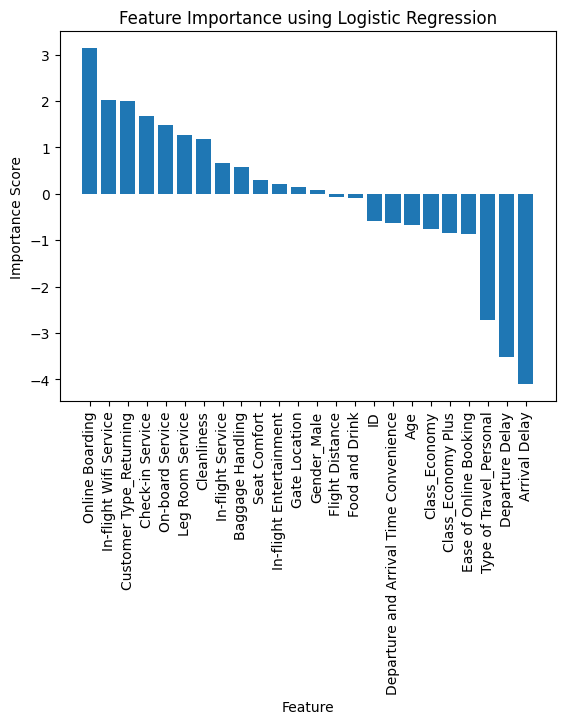

In [ ]:
from sklearn.linear_model import LogisticRegression

feature_names = X.columns


# Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Extract feature importance
importance = model.coef_[0]  # For Logistic Regression, we can directly access coef_ for coefficients

# Map importance values to feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort by importance for easier visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance using Logistic Regression')
plt.show()


Random Forest

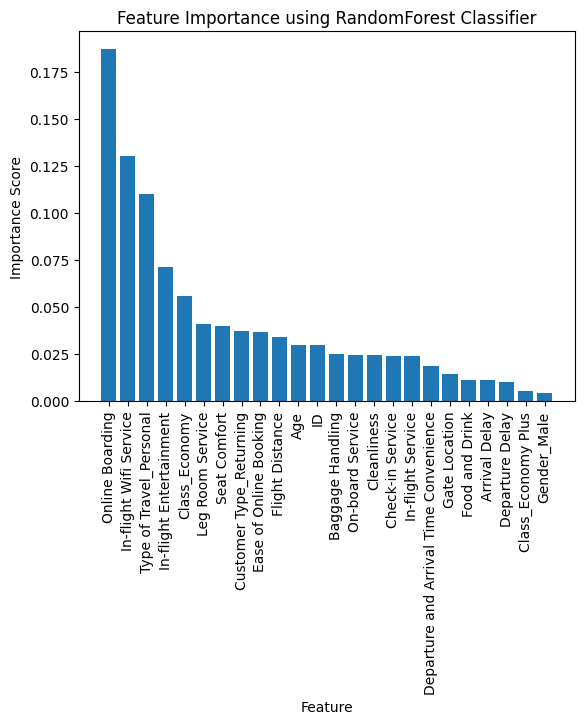

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Extract feature importances
importance = model.feature_importances_

# Map importance values to feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance for easier visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance using RandomForest Classifier')
plt.show()


XGBoost

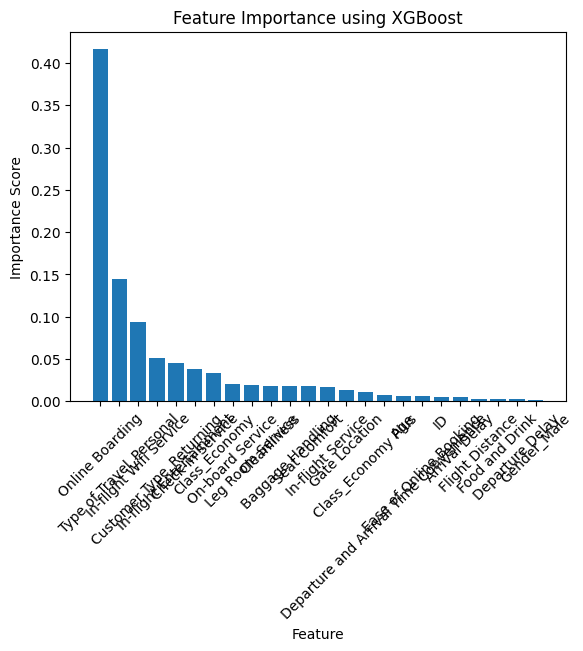

In [ ]:
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Extract feature importances
importance = model.feature_importances_

# Map importance values to feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance for easier visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance using XGBoost')
plt.show()


Accuracy when only 5 most impactful Random Forest features are considered. Accuracy is calculated with Logistic Regression

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# Splitting data
X = df_scaled.drop('Satisfaction', axis=1)
y = df_scaled['Satisfaction']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 83.27


Calculating accuracy when 5 most important XGBoost features are considered.

In [ ]:
# Feature selection function
def select_features(X_train, y_train, X_test):
    # Configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(n_estimators=1000), max_features=5)
    # Learn relationship from training data
    fs.fit(X_train, y_train)
    # Transform train input data
    X_train_fs = fs.transform(X_train)
    # Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# Evaluate the model
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 83.27


Calculating accuracy when 5 most important Decision Tree features are considered.

In [ ]:
def select_features(X_train, y_train, X_test):
    # Configure to select a subset of features
    fs = SelectFromModel(DecisionTreeClassifier(random_state=42), max_features=5)
    # Learn relationship from training data
    fs.fit(X_train, y_train)
    # Transform train input data
    X_train_fs = fs.transform(X_train)
    # Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Splitting data
X = df_scaled.drop('Satisfaction', axis=1)
y = df_scaled['Satisfaction']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Fit the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 91.61


Calculating accuracy considering 5 most important Logistic Regression features.

In [ ]:
def select_features(X_train, y_train, X_test):
    # Configure to select a subset of features
    fs = SelectFromModel(LogisticRegression(solver='liblinear', random_state=42), max_features=5)
    # Learn relationship from training data
    fs.fit(X_train, y_train)
    # Transform train input data
    X_train_fs = fs.transform(X_train)
    # Transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Splitting data
X = df_scaled.drop('Satisfaction', axis=1)
y = df_scaled['Satisfaction']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Fit the model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 79.59


Accuracy when all features are considered using Logic Regression

In [ ]:
# Splitting data
X = df_scaled.drop('Satisfaction', axis=1)  # Features
y = df_scaled['Satisfaction']  # Target variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the model
model = LogisticRegression(solver='liblinear')

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
yhat = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy * 100))


Accuracy: 87.37
